In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Vi behöver:
# Q, N, epsilon, Anatalet armar (numArms), ett arm drag (pull) och updatering av Q.
# 1 simulation = 1000 drag/pulls, vi ser på medel över 2000 simualtioner och med epsilon = 0.1, 0.01 & 0

class Bandit(object):
    def __init__(self, numArms, trueRewards, epsilon):    # takes as parameters
        self.Q = [0 for i in range(numArms)]              #initial values 
        self.N = [0 for i in range(numArms)]              #initial values
        self.numArms = numArms
        self.epsilon = epsilon           
        self.trueRewards = trueRewards                    # save the true rewards and las action
        self.lastAction = None

    def pull(self):
        rand = np.random.random()                         # uniform distributed number
        if rand <= self.epsilon: 
            whichArm = np.random.choice(self.numArms)     # compare a random number with epsilon,  
        elif rand > self.epsilon:                         # if smaller we take random action
            a = np.array([approx for approx in self.Q])   # otherwise we take the argmax of the estimates of the rewards
            whichArm = np.random.choice(np.where(a == a.max())[0]) # we create a list with the max values, if we get more than one then we choose randomly
        self.lastAction = whichArm                                 # we keep the value of the arm 

        return np.random.randn() + self.trueRewards[whichArm]      # we return a normal distribution reward centered in the true reward for that action

    def updateMean(self, sample):                                  # update the bandits estimate of the rewards
        whichArm = self.lastAction                                 
        self.N[whichArm] += 1                                      # update N
        self.Q[whichArm] = self.Q[whichArm] + 1.0/self.N[whichArm]*(sample - self.Q[whichArm]) # update Q

In [3]:
class Bandit(object):
    def __init__(self, numArms, trueRewards, epsilon):    # takes as parameters
        self.Q = [0 for i in range(numArms)]              # initial values 
        self.N = [0 for i in range(numArms)]              # initial values
        self.numArms = numArms
        self.epsilon = epsilon           
        self.trueRewards = trueRewards                    # save the true rewards and las action
        self.lastAction = None

    def pull(self):
        rand = np.random.random()                         # uniform distributed number
        if rand <= self.epsilon: 
            whichArm = np.random.choice(self.numArms)     # compare a random number with epsilon,  
        elif rand > self.epsilon:                         # if smaller we take random action
            a = np.array([approx for approx in self.Q])   # otherwise we take the argmax of the estimates of the rewards
            whichArm = np.random.choice(np.where(a == a.max())[0]) # we create a list with the max values, if we get more than one then we choose randomly
        self.lastAction = whichArm                                 # we keep the value of the arm 

        return np.random.randn() + self.trueRewards[whichArm]      # we return a normal distribution reward centered in the true reward for that action

    def updateMean(self, sample):                                  # update the bandits estimate of the rewards
        whichArm = self.lastAction                                 
        self.N[whichArm] += 1                                      # update N
        self.Q[whichArm] = self.Q[whichArm] + 1.0/self.N[whichArm]*(sample - self.Q[whichArm]) # update Q

In [4]:
def simulate(numArms, epsilon, numPulls):
    rewardHistory = np.zeros(numPulls)                              # rewards history to calculate the average
    for j in range(2000):                                           # run 2000 simulations new reward and a new bandit
        rewards = [np.random.randn() for _ in range(numArms)]
        bandit = Bandit(numArms, rewards, epsilon)
        if j % 200 == 0:
            print(j)
        for i in range(numPulls):                                   # evaluate 1000 times and keep track of the weward 
            reward = bandit.pull()
            bandit.updateMean(reward)

            rewardHistory[i] += reward
    average = rewardHistory / 2000                                  # once we finish we compute the average

    return average

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800


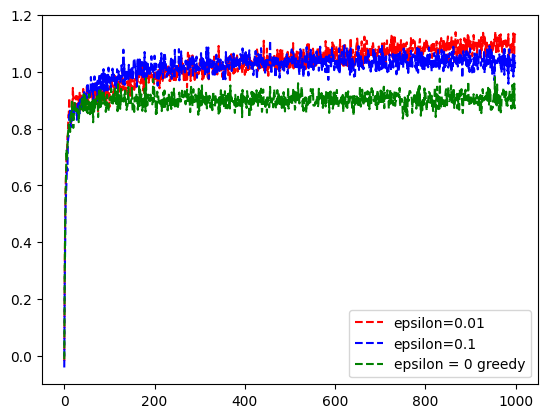

In [5]:
#main function

numARMS = 5
run0 = simulate(numARMS, epsilon = 0.01, numPulls=1000)
run1 = simulate(numARMS, epsilon = 0.1, numPulls=1000)
run2 = simulate(numARMS, epsilon = 0, numPulls=1000)   # greedy

plt.plot(run0, 'r--',run1, 'b--',run2, 'g--')
plt.legend(['epsilon=0.01','epsilon=0.1','epsilon = 0 greedy'])
plt.show()